<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>TABLE OF CONTENTS</center></h1>

### [**1. IMPORTING LIBRARIES**](#title-one)
    
### [**2. LOADING DATA**](#title-two)

### [**3. DATA ANALYSIS & VISUALIZATION**](#title-three)

### [**4. MODEL BUILDING**](#title-four)

### [**5. END**](#title-five)

<a id = "title-one"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>IMPORTING LIBRARIES</center></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

<a id = "title-two"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>LOADING DATA</center></h1>

In [2]:
data_df = pd.read_csv("C:/Users/Michael Kayentey/OneDrive/Desktop/project 1/fetal_health.csv")
data_df.sample()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1795,121.0,0.0,0.0,0.004,0.009,0.001,0.0,70.0,1.9,0.0,...,55.0,157.0,6.0,2.0,67.0,76.0,79.0,68.0,-1.0,3.0


In [3]:
data_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# converting or formatting the decimal values
pd.set_option('display.float_format',lambda x:'%.3f' %x)

In [5]:
data_df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,1.000
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,1.000
5,134.000,0.001,0.000,0.010,0.009,0.000,0.002,26.000,5.900,0.000,...,50.000,200.000,5.000,3.000,76.000,107.000,107.000,170.000,0.000,3.000
6,134.000,0.001,0.000,0.013,0.008,0.000,0.003,29.000,6.300,0.000,...,50.000,200.000,6.000,3.000,71.000,107.000,106.000,215.000,0.000,3.000
7,122.000,0.000,0.000,0.000,0.000,0.000,0.000,83.000,0.500,6.000,...,62.000,130.000,0.000,0.000,122.000,122.000,123.000,3.000,1.000,3.000
8,122.000,0.000,0.000,0.002,0.000,0.000,0.000,84.000,0.500,5.000,...,62.000,130.000,0.000,0.000,122.000,122.000,123.000,3.000,1.000,3.000
9,122.000,0.000,0.000,0.003,0.000,0.000,0.000,86.000,0.300,6.000,...,62.000,130.000,1.000,0.000,122.000,122.000,123.000,1.000,1.000,3.000


<div style="border-radius:10px;
            border :#483D8B solid;
            background-color:#B0C4DE;
           font-size:110%;
            text-align: left">
    
## <h2 style='border:0; color:black'><center>About the data (Description of attributes)</center></h2>

**This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes: "Normal", "Suspect" & "Pathological". Dataset having the following features:**  
    
* **baseline value:** Baseline Fetal Heart Rate (FHR) (beats per minute)   
* **accelerations:** Number of accelerations per second
* **fetal_movement:** Number of fetal movements per second    
* **uterine_contractions:** Number of uterine contractions per second
* **light_decelerations:** Number of light decelerations (LDs) per second
* **severe_decelerations:** Number of severe decelerations (SDs) per second
* **prolongued_decelerations:** Number of prolonged decelerations (PDs) per second
* **abnormal_short_term_variability:** Percentage of time with abnormal short term variability
* **mean_value_of_short_term_variability:** Mean value of short term variability
* **percentage_of_time_with_abnormal_long_term_variability:** Percentage of time with abnormal long term variability
* **mean_value_of_long_term_variability:** Mean value of long term variability
* **histogram_width:** Width of histogram made using all values from a record
* **histogram_min:** Histogram minimum value
* **histogram_max:** Histogram maximum value
* **histogram_number_of_peaks:** Number of peaks in the exam histogram
* **histogram_number_of_zeroes:** Number of zeros in the exam histogram
* **histogram_mode:** Histogram mode
* **histogram_mean:** Histogram mean
* **histogram_median:** Histogram median
* **histogram_variance:** Histogram variance
* **histogram_tendency:** Histogram tendency
* **fetal_health:** Encoded as 1-Normal; 2-Suspect; 3-Pathological. <mark>It is our very target column in the dataset.</mark>

In [6]:
data_df.rename(columns={
                         'uterine_contractions': 'Uterine Contractions',
                        'light_decelerations': 'Light Decelerations',
                        'severe_decelerations': 'Severe Decelerations'}, inplace=True)


In [7]:
data_df.head()

,baseline value,accelerations,fetal_movement,Uterine Contractions,Light Decelerations,Severe Decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,2.000
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,1.000
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,1.000
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,1.000
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,1.000


<a id = "title-three"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>DATA ANALYSIS & VISUALIZATION</center></h1>

### **<span style="color:#483D8B;"><center>Checking for missing values & categorical variables</center></span>**

In [8]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   Uterine Contractions                                    2126 non-null   float64
 4   Light Decelerations                                     2126 non-null   float64
 5   Severe Decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
data_df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
Uterine Contractions                                      0
Light Decelerations                                       0
Severe Decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
# Visualizing the missing values in the dataset,
#missing_values = msno.bar(data_df, figsize = (16,5),color = "red")

### **<span style="color:#483D8B;">Note: </span>**
* <strong>There are 2126 non-null values in all the attributes thus no missing values.</strong>
* <strong>Datatype of all the features are float64 which works well with the model building.</strong>

### **<span style="color:#483D8B;"><center>Descriptive Statistics</center></span>**

In [11]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.000,133.304,9.841,106.000,126.000,133.000,140.000,160.000
accelerations,2126.000,0.003,0.004,0.000,0.000,0.002,0.006,0.019
fetal_movement,2126.000,0.009,0.047,0.000,0.000,0.000,0.003,0.481
Uterine Contractions,2126.000,0.004,0.003,0.000,0.002,0.004,0.007,0.015
Light Decelerations,2126.000,0.002,0.003,0.000,0.000,0.000,0.003,0.015
Severe Decelerations,2126.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.000,0.000,0.001,0.000,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.000,46.990,17.193,12.000,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.000,1.333,0.883,0.200,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.000,9.847,18.397,0.000,0.000,0.000,11.000,91.000


FOR RECODING CATEGORICAL VARIABLES(either GET DUMMY FUNCTION OR LABELENCODER)

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['buying','maint','lug_boot','safety']] = \
X.loc[:,['buying','maint','lug_boot','safety']].apply(enc.fit_transform)
X.head()

In [12]:
result = data_df.groupby('fetal_health').mean()
result

,baseline value,accelerations,fetal_movement,Uterine Contractions,Light Decelerations,Severe Decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.000,131.982,0.004,0.008,0.005,0.002,0.000,0.000,42.466,1.431,5.045,...,73.400,91.086,164.486,4.163,0.335,138.259,135.102,138.460,17.480,0.342
2.000,141.685,0.000,0.008,0.002,0.001,0.000,0.000,61.902,0.639,29.031,...,49.159,113.295,162.454,3.312,0.244,146.556,144.759,147.071,7.214,0.434
3.000,131.688,0.000,0.026,0.004,0.004,0.000,0.001,64.540,1.576,22.847,...,78.347,83.983,162.330,4.443,0.347,114.608,112.977,119.562,50.733,-0.074


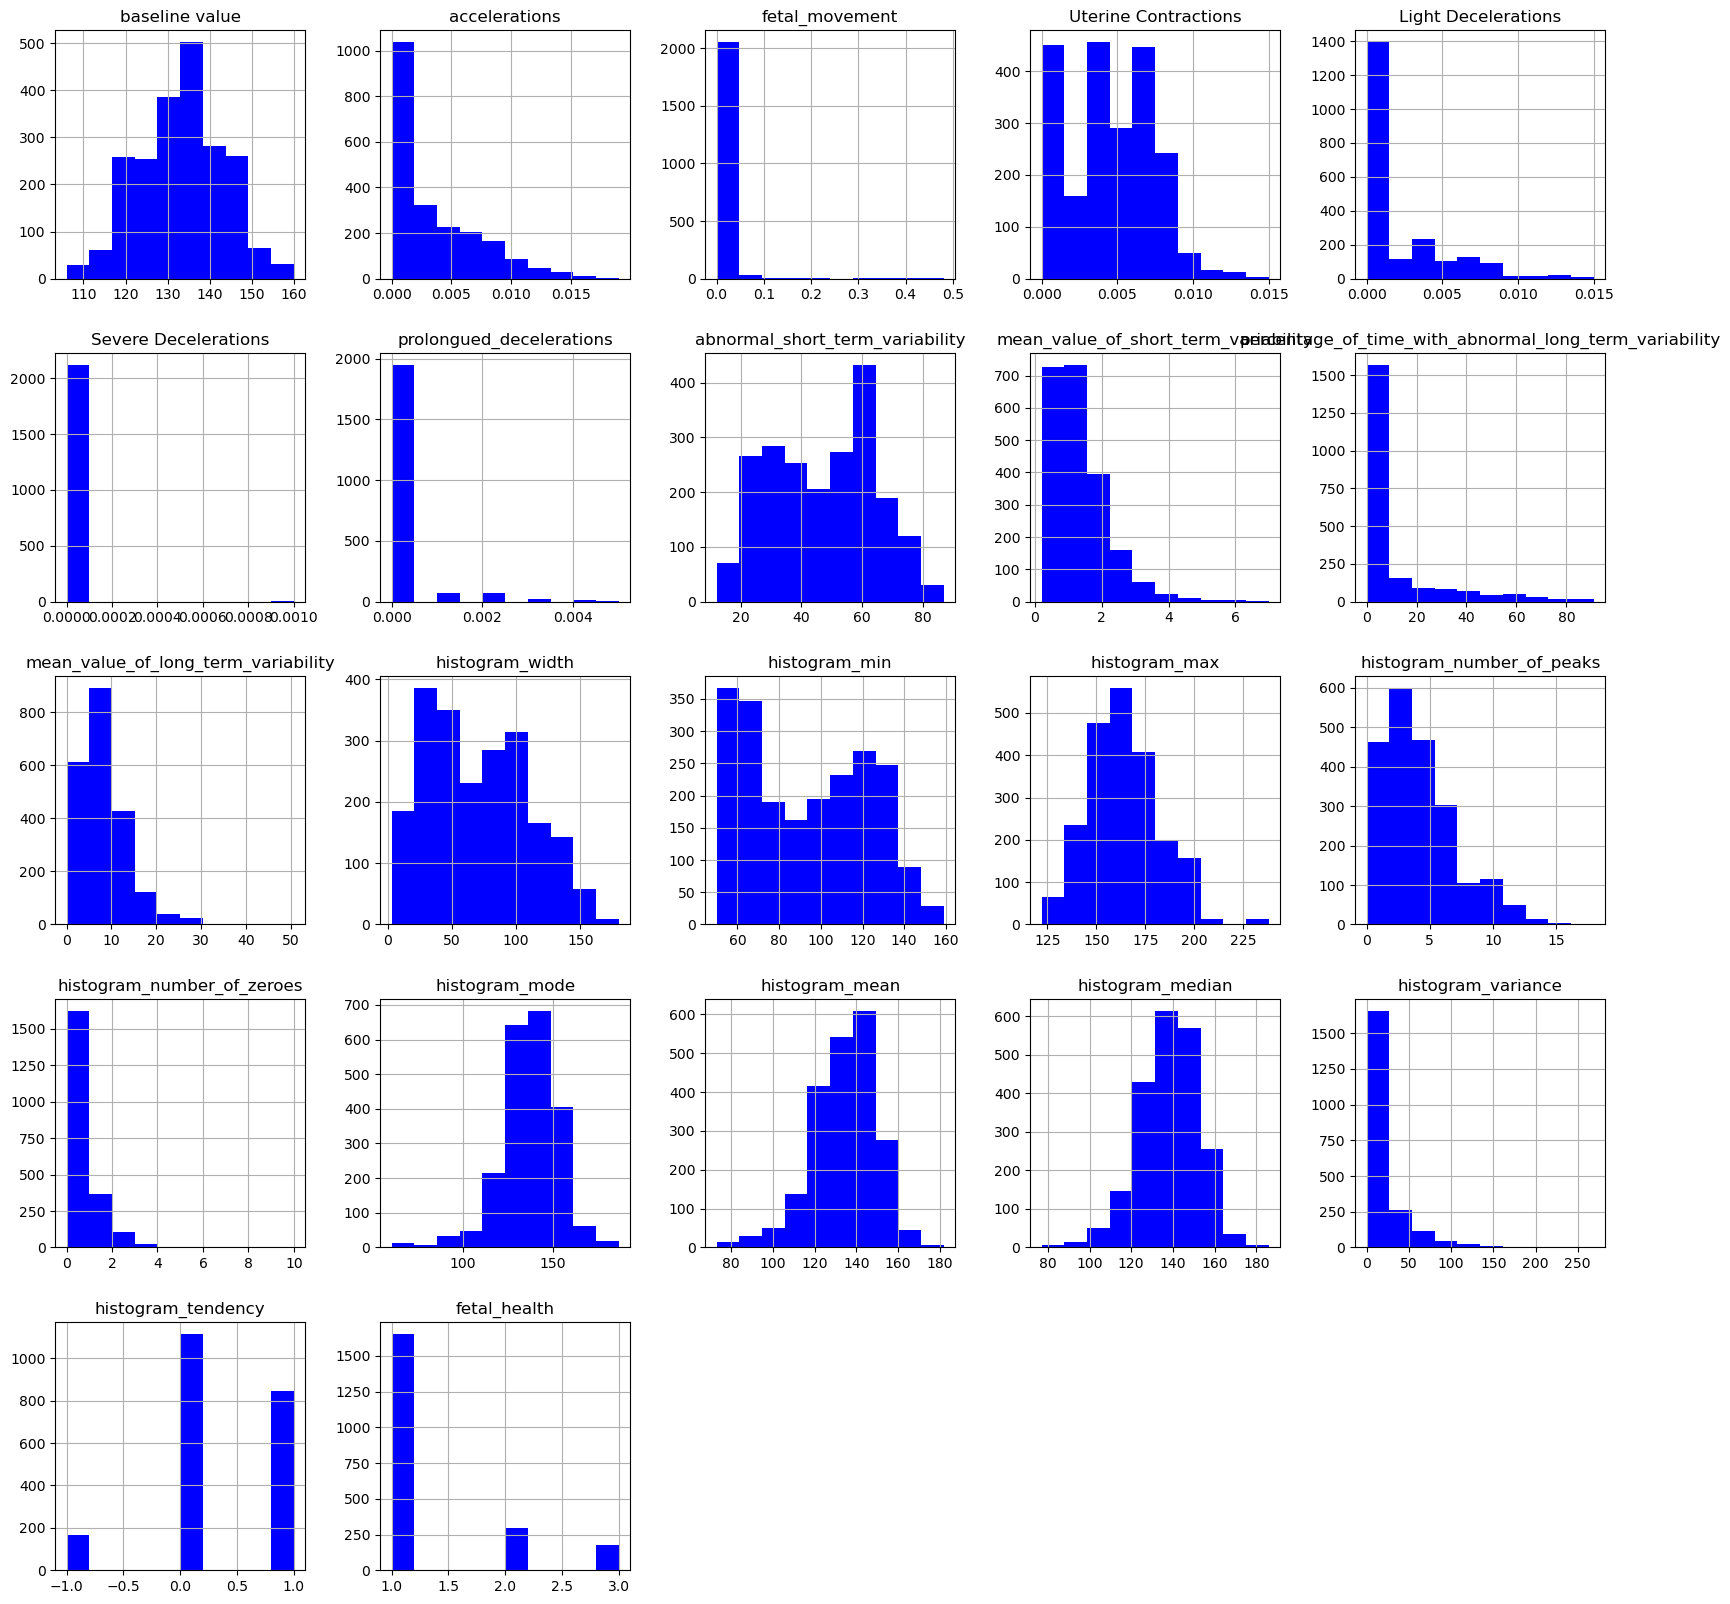

In [13]:
# Evaluating distributions of the features
hist_plot = data_df.hist(figsize = (20,20), color = "blue")

### **<span style="color:#483D8B;">Note: </span>**
* <strong>All the attributes more or less are midly skewed and are normally distributed except the features "light_decelerations", "precentage_of_time_with_abnormal_long_term_variability" etc.
    Skewed data can lead to biase estimate,misleading interpretation and can affect model performance.Models trained on skewed data may have a biased understanding of the underlying patterns, leading to poor generalization on unseen data.

You can transform the data especially if you are using a linear model, however there some models that are robust and less sensitive to skewed data such as decision tree,random forest etc</strong>


In [14]:
#log_transformed_data = np.log1p(data_df)

# If you need to transform it back, you can use:

# transformed_back_data = np.expm1(log_transformed_data)

### **<span style="color:#483D8B;"><center>Evaluating Target Feature</center></span>**

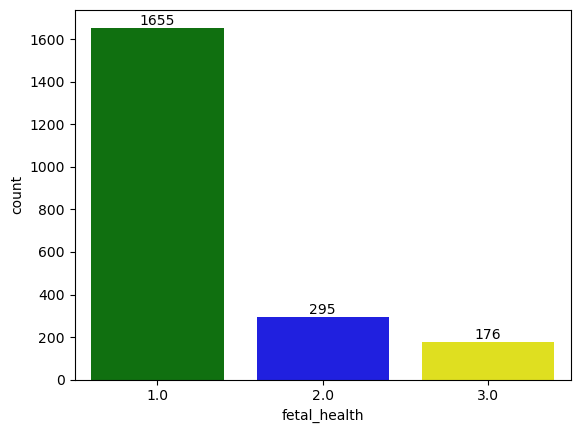

In [15]:
# Evaluating the target column and checking for imbalance of the data,
colors=["green","blue", "yellow"]
ax = sns.countplot(data= data_df, x="fetal_health", palette=colors)
ax.bar_label(ax.containers[0])
plt.show()

### **<span style="color:#483D8B;">Note: </span>**
* <strong>Target labels are highly imbalanced as can be seen from the plot.
When your target label is imbalanced, meaning that one class is significantly more prevalent than the other(s), it can have several effects on your model:
1.Bias Towards Majority Class: Models trained on imbalanced data tend to be biased towards the majority class
2.Difficulty learning
3.Poor generalization and misleading evaluation metrics

</strong>

# To deal with imbalance data we employ:

Resampling Techniques:

1. Undersampling: Randomly remove samples from the majority class to balance the class distribution.
2. Oversampling: Duplicate samples from the minority class to increase its representation in the dataset.
3. Synthetic Minority Over-sampling Technique (SMOTE): Generate synthetic examples for the minority class to balance the distribution.

Algorithmic Approaches:

Use algorithms that are inherently robust to class imbalance, such as decision trees, random forests, or gradient boosting machines.


### **<span style="color:#483D8B;"><center>Correlation Matrix</center></span>**

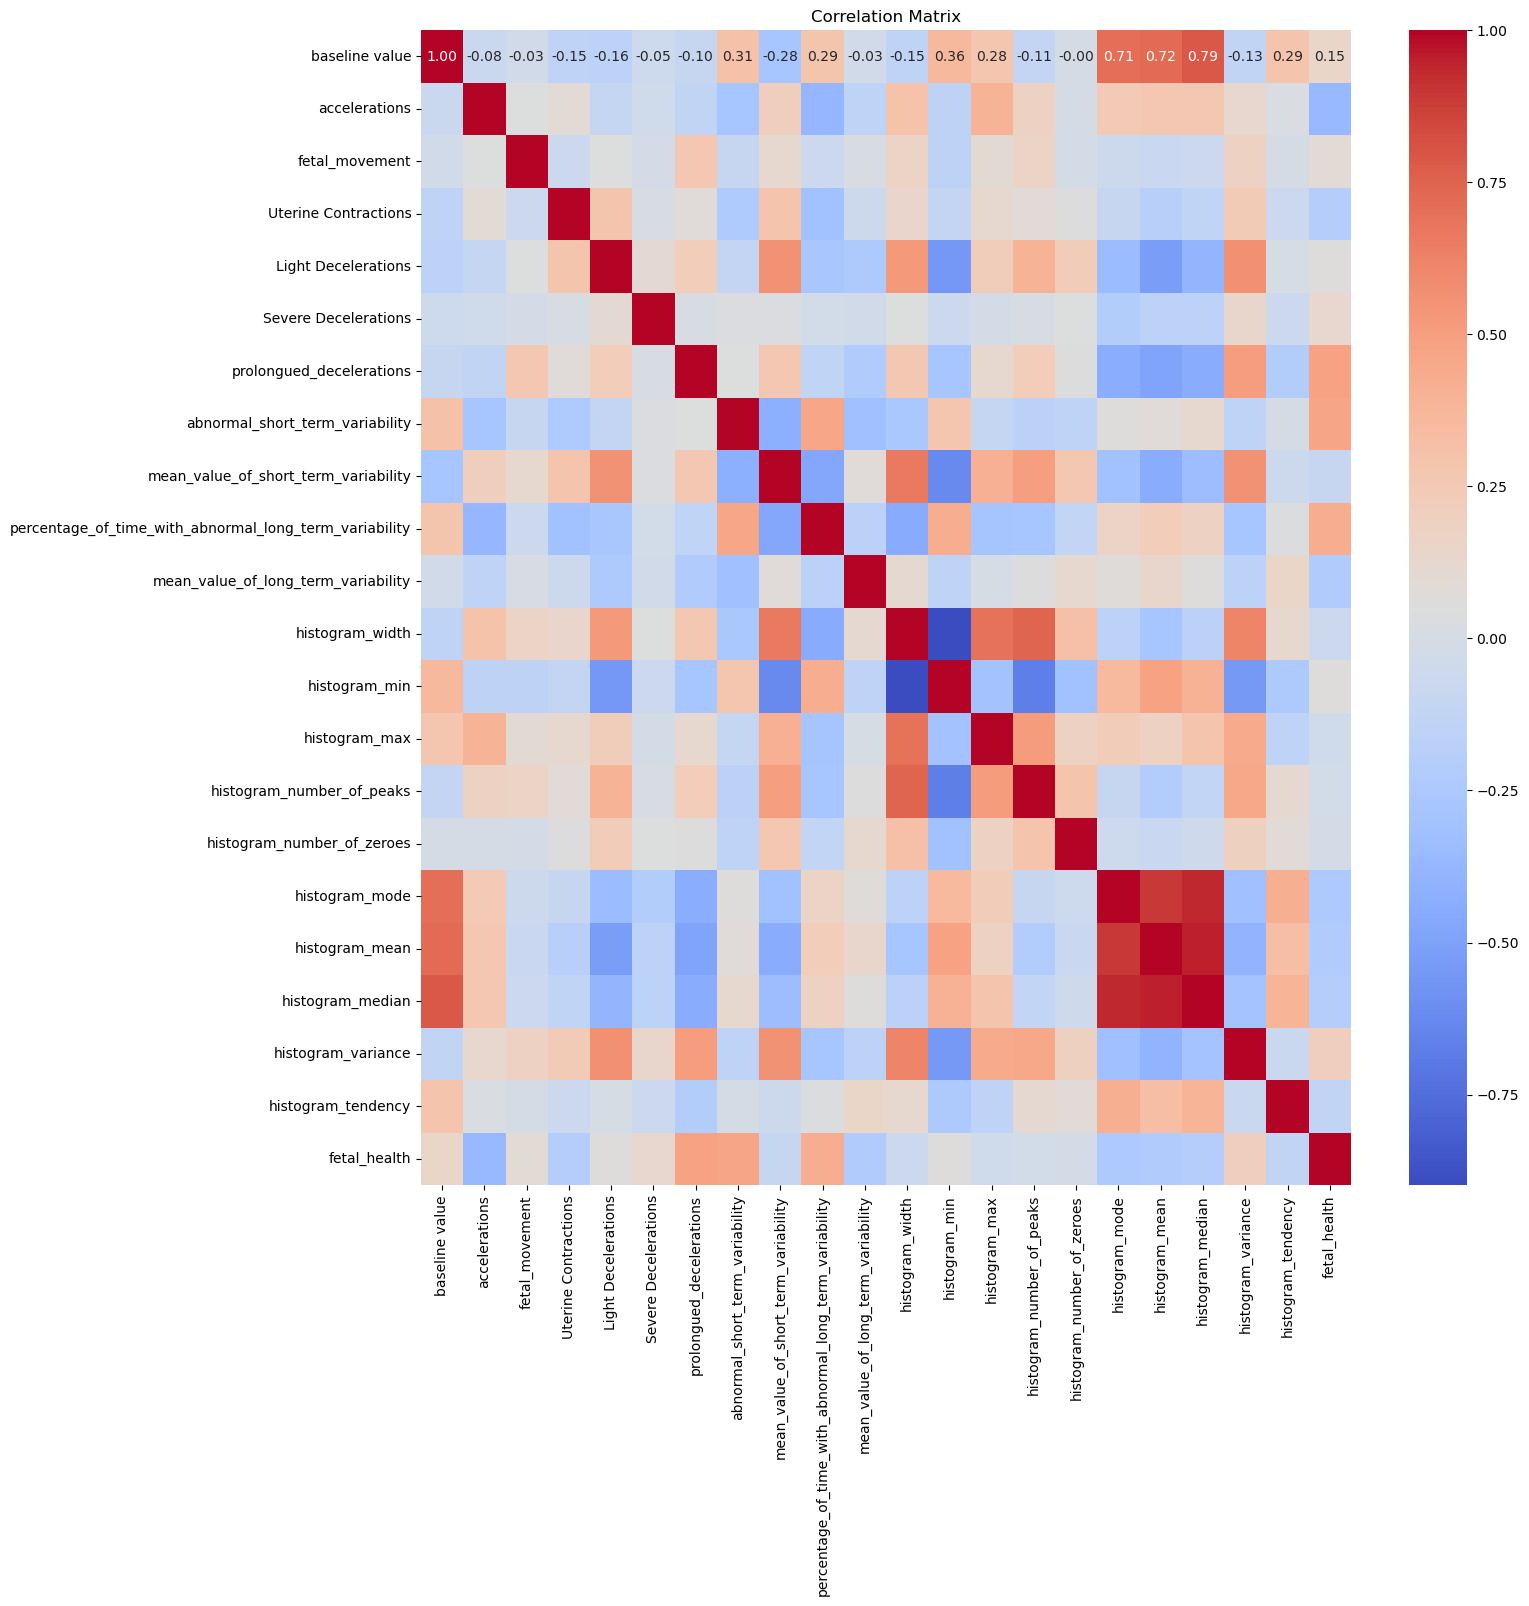

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [16]:
correlation_matrix = data_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
plt.tight_layout

### **<span style="color:#483D8B;"><center>Scaling the Data</center></span>**

In [17]:
# Defining independent and dependent attributes in training and test sets
X=data_df.drop(["fetal_health"],axis=1)
y=data_df["fetal_health"]

In [18]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.000,0.000,1.000,-2.775,-0.742,-0.031,0.681,2.713
accelerations,2126.000,-0.000,1.000,-0.822,-0.822,-0.305,0.730,4.094
fetal_movement,2126.000,-0.000,1.000,-0.203,-0.203,-0.203,-0.139,10.107
Uterine Contractions,2126.000,-0.000,1.000,-1.482,-0.803,-0.124,0.894,3.610
Light Decelerations,2126.000,-0.000,1.000,-0.638,-0.638,-0.638,0.375,4.430
Severe Decelerations,2126.000,0.000,1.000,-0.057,-0.057,-0.057,-0.057,17.399
prolongued_decelerations,2126.000,0.000,1.000,-0.269,-0.269,-0.269,-0.269,8.209
abnormal_short_term_variability,2126.000,-0.000,1.000,-2.036,-0.872,0.117,0.815,2.328
mean_value_of_short_term_variability,2126.000,0.000,1.000,-1.283,-0.717,-0.150,0.416,6.418
percentage_of_time_with_abnormal_long_term_variability,2126.000,-0.000,1.000,-0.535,-0.535,-0.535,0.063,4.412


### **<span style="color:#483D8B;"><center>Checking for Outliers</center></span>**

In [19]:
features=['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
           'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
             'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']

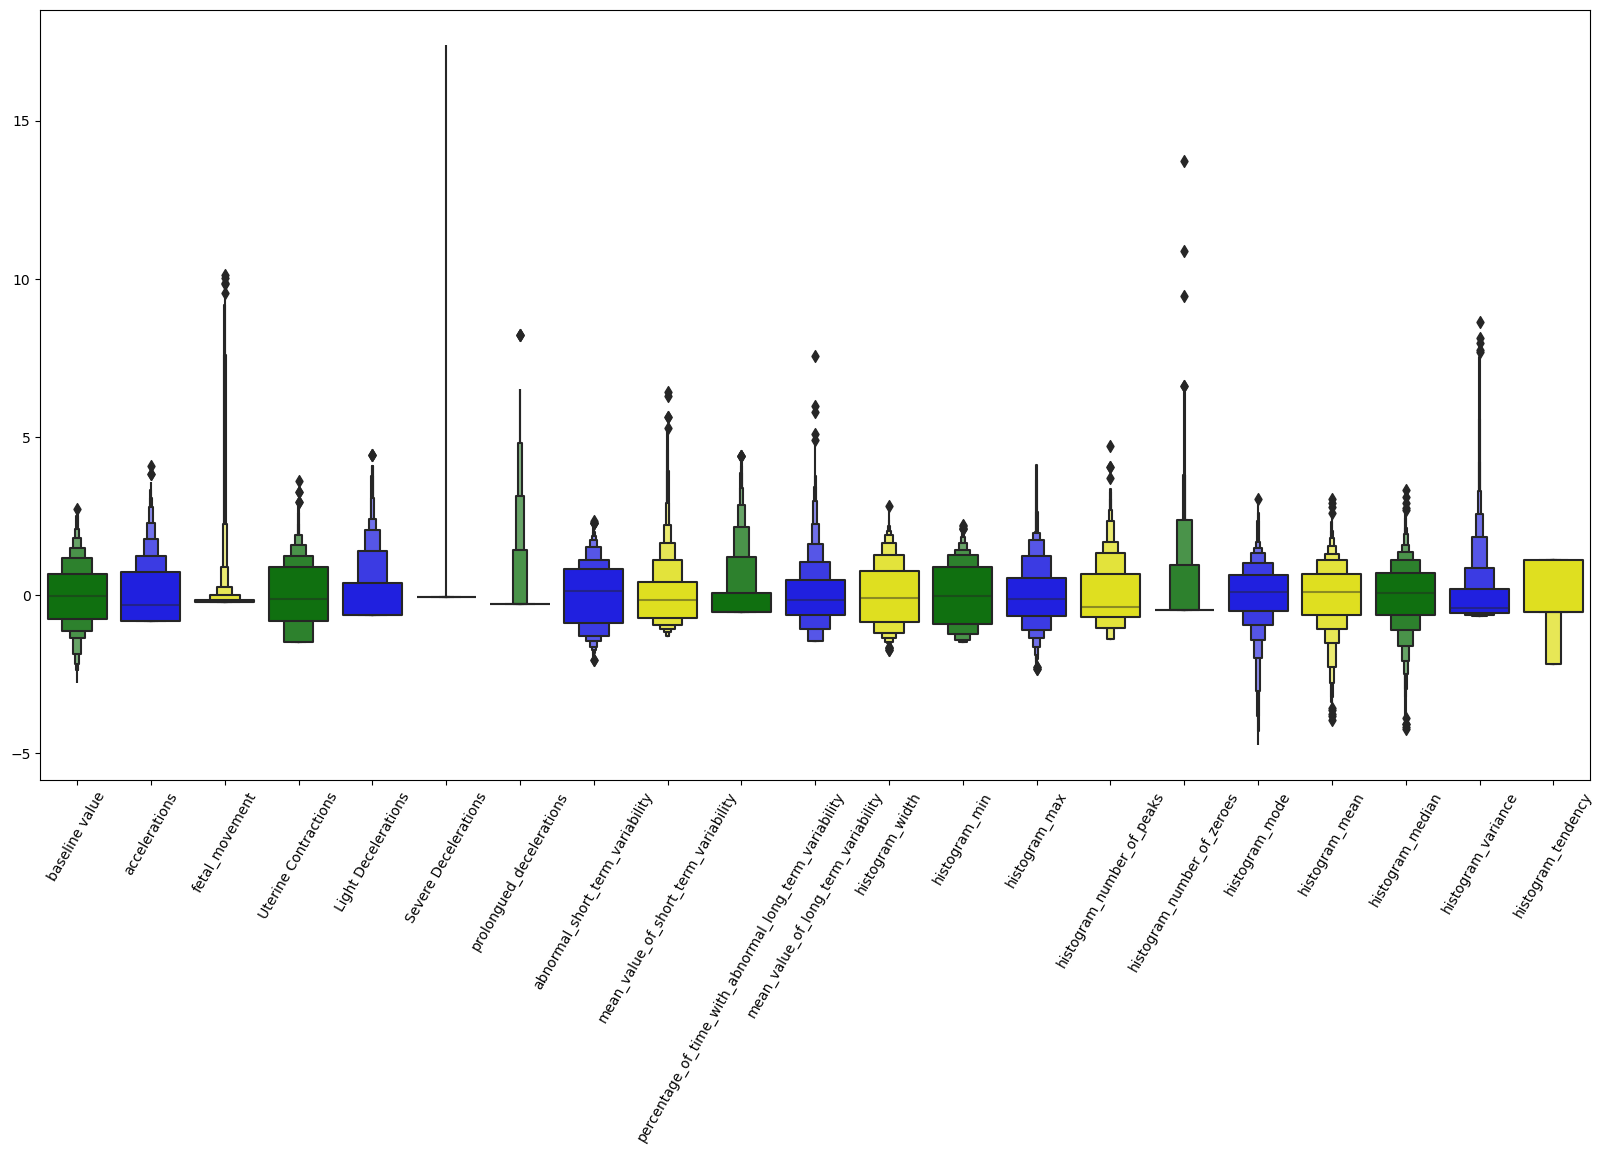

In [20]:
#Plotting the scaled features using boxen plots
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

### **<span style="color:#483D8B;">Note: </span>**
* <strong>The plot clearly indicates that all the features are in same range since we have scaled the data.</strong>
* <strong>Outliers can be spotted in certain features, which we have to make a call whether to take it along or drop it off.</strong>
* <strong>Assuming outliers aren't cause of the typo or measurement error (human error) we aren't taking it down to avoid the overfitting of the model as well as the loss of information. </strong>

<a id = "title-four"></a>
<h1 style='background:#483D8B; border:0; border-radius: 10px; color:white'><center>MODEL BUILDING</center></h1>

### **<span style="color:#483D8B;"><center>Splitting Train & Test Set</center></span>**

In [21]:
# Splitting the training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

# DEALING WITH IMBALANCE DATA

#NB:You need to install imblearn library if you are using other environment that requires it

---



In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [23]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [24]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({1.0: 1331, 2.0: 235, 3.0: 134})
After SMOTE : Counter({2.0: 1331, 1.0: 1331, 3.0: 1331})


## Random Undersampling
'not minority' = resample all classes but the minority class

In [25]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
#X_res, y_res = rus.fit_resample(X, y)
#ax = y_res.value_counts().plot.pie(autopct='%.2f') _ = ax.set_title("Under-sampling")

In [26]:
# Class distribution
#y_res.value_counts()

## Random Oversampling
"not majority" = resample all classes but the majority class

In [27]:
#from imblearn.over_sampling import RandomOverSampler
##ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f') _ = ax.set_title("Over-sampling")

SyntaxError: invalid syntax (1615305439.py, line 5)

In [28]:
# Class distribution
#y_res.value_counts()

SMOTE Technique is commonly used to resolve class imbalance issues

### **<span style="color:#483D8B;"><center>Model Selection</center></span>**

In [29]:
# Building pipelines of model for various classifiers

pipeline_lr = Pipeline([('lr_classifier',LogisticRegression())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_gbcl, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Gradient Boost', 3:'RandomForest', 4: 'KNN'}


# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [30]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.865315 
Decision Tree: 0.921799 
Gradient Boost: 0.945294 
RandomForest: 0.937098 
KNN: 0.887070 


In [31]:
# Building pipelines of model for various classifiers after SMOTE

pipeline_lr = Pipeline([('lr_classifier',LogisticRegression())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_gbcl, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Gradient Boost', 3:'RandomForest', 4: 'KNN'}


# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(X_train_smote, y_train_smote)

In [32]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model,X_train_smote, y_train_smote, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.804643 
Decision Tree: 0.953676 
Gradient Boost: 0.969698 
RandomForest: 0.978714 
KNN: 0.941147 


### **<span style="color:#483D8B;">Note: </span>**
* <strong>Gradient Boost among the five models performs best with our data so we shall proceed with it.</strong>

### **<span style="color:#483D8B;"><center>Grandient Boost Classifier</center></span>**

In [33]:
# Baseline model of gradient boosting classifier with default parameters:
gbcl = GradientBoostingClassifier()
gbcl_model = gbcl.fit(X_train, y_train)
print(f"Baseline Gradient Boosting Classifier Score: {round(gbcl_model.score(X_test, y_test), 2)}")

pred_gbcl = gbcl_model.predict(X_test)

Baseline Gradient Boosting Classifier Score: 0.95


In [34]:
# Cross validate Gradient Boosting Classifier model
scores_gbcl = cross_val_score(gbcl, X_train, y_train, cv = 8, n_jobs = 2, scoring = "accuracy")

print(f"CV scores for Gradient Boosting Classifier model:\n{scores_gbcl}")
print(f"CV Mean score: {round(scores_gbcl.mean(), 2)}")

CV scores for Gradient Boosting Classifier model:
[0.96244131 0.93896714 0.92957746 0.94366197 0.97641509 0.95283019
 0.93396226 0.95754717]
CV Mean score: 0.95


### **<span style="color:#483D8B;"><center>Model Tunning for Optimum performance</center></span>**

### **<span style="color:#483D8B;"><center>Grid Search CV</center></span>**

In [35]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              "n_estimators": [200, 350, 500, 750],
              "max_depth": [3, 6, 8]
              }

In [36]:
GridSearchCV_gbcl = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid=parameters,
                                cv=2,
                                verbose=1,
                                n_jobs=3,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [37]:
GridSearchCV_gbcl.fit(X_train, y_train);

Fitting 2 folds for each of 84 candidates, totalling 168 fits


In [38]:
best_parameters = GridSearchCV_gbcl.best_params_
print(f"Best parameters for the model:\n{best_parameters}")

Best parameters for the model:
{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 6, 'n_estimators': 500}


### **<span style="color:#483D8B;"><center>Testing stage</center></span>**

In [39]:
# Testing with the best parameters,

gbcl = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=0.5, loss="deviance",
                                  max_depth=6, max_features="log2", min_samples_leaf=0.3,
                                  min_samples_split=0.5, n_estimators=500, random_state=25)

gbcl_mod = gbcl.fit(X_train, y_train)
pred_gbcl = gbcl_mod.predict(X_test)

score_gbcl_train = gbcl_mod.score(X_train, y_train)
score_gbcl_test = gbcl_mod.score(X_test, y_test)

In [40]:
print(f"r^2(coefficient of determination) on training set = {round(score_gbcl_train, 3)}")
print(f"r^2(coefficient of determination) on testing set = {round(score_gbcl_test, 3)}")

r^2(coefficient of determination) on training set = 0.956
r^2(coefficient of determination) on testing set = 0.899


In [41]:
# Getting score on the Test set,

pred_gbcl = pipeline_gbcl.predict(X_test)
accuracy = accuracy_score(y_test, pred_gbcl)
print(f" Testing Score of the model is {accuracy}")

 Testing Score of the model is 0.9507042253521126


In [42]:
# Getting the Classification report
print(classification_report(y_test, pred_gbcl))

              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       324
         2.0       0.83      0.90      0.86        60
         3.0       0.91      0.98      0.94        42

    accuracy                           0.95       426
   macro avg       0.91      0.94      0.93       426
weighted avg       0.95      0.95      0.95       426



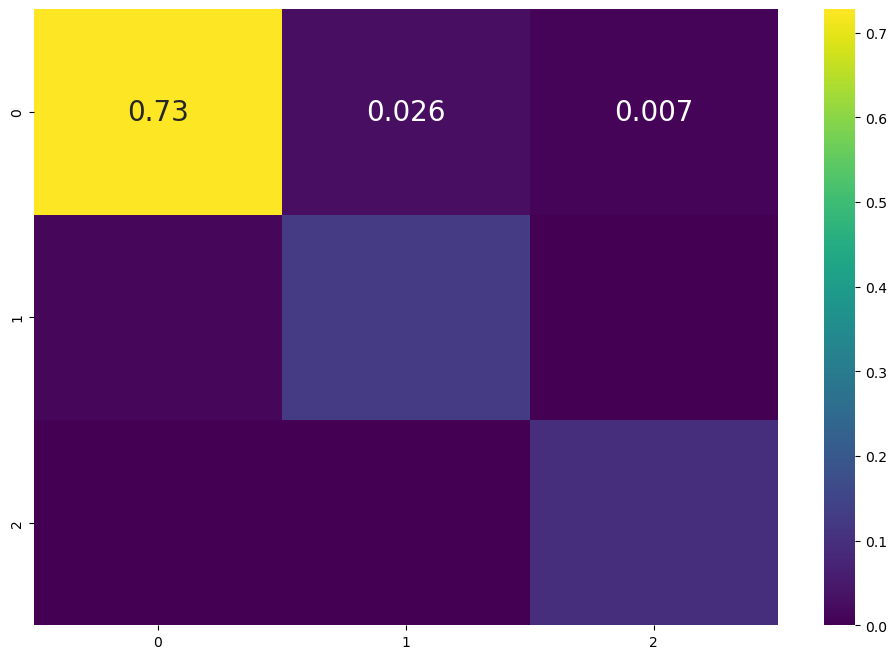

In [43]:
# Getting the Confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_gbcl)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

# SAVING THE MODEL INTO A PICKLE FILE FOR DEPLOYMENT

In [44]:
import pickle

# Save the model to a file
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gbcl, f)


In [45]:
import joblib
joblib.dump(gbcl, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']